# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

1. **school** - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. **sex** - student's sex (binary: "F" - female or "M" - male)
3. **age** - student's age (numeric: from 15 to 22)
4. **address** - student's home address type (binary: "U" - urban or "R" - rural)
5. **famsize** - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6. **Pstatus** - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7. **Medu** - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. **Fedu** - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. **Mjob** - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. **Fjob** - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. **reason** - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12. **guardian** - student's guardian (nominal: "mother", "father" or "other")
13. **traveltime** - home to school travel time (numeric: 1 - < 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. **studytime** - weekly study time (numeric: 1 - < 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. **failures** - number of past class failures (numeric: n if 1<=n< 3, else 4)
16. **schoolsup** - extra educational support (binary: yes or no)
17. **famsup** - family educational support (binary: yes or no)
18. **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. **activities** - extra-curricular activities (binary: yes or no)
20. **nursery** - attended nursery school (binary: yes or no)
21. **higher** - wants to take higher education (binary: yes or no)
22. **internet** - Internet access at home (binary: yes or no)
23. **romantic** - with a romantic relationship (binary: yes or no)
24. **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
26. **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
27. **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. **health** - current health status (numeric: from 1 - very bad to 5 - very good)
30. **absences** - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
31. **G1** - first period grade (numeric: from 0 to 20)
31. **G2** - second period grade (numeric: from 0 to 20)
32. **G3** - final grade (numeric: from 0 to 20, output target)

Additional note: there are several (382) students that belong to both datasets. These students can be identified by searching for identical attributes that characterize each student, as shown in the annexed R file.

In [ ]:
!pip install optuna

### Load and separe data

In [1]:
import pandas as pd
import numpy as np
import optuna
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.svm import SVC

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
PATH_TO_DRIVE = './Datasets/'
# PATH_TO_DRIVE = 'https://sagemaker-us-east-1-198954840051.s3.amazonaws.com/Datasets/student-por.csv'

In [3]:
# Loading and normalizing the data from student-por.csv, all binary values 
# replaced to 0 or 1. The dataset doesn't have any missing values.
df_port = pd.read_csv(PATH_TO_DRIVE + 'student-por.csv', sep=';', converters={
    'school': lambda x: int(x == 'GP'),
    'sex': lambda x: int(x == 'F'),
    'address': lambda x: int(x == 'U'),
    'famsize': lambda x: int(x == 'LE3'),
    'Pstatus': lambda x: int(x == 'T'),
    'schoolsup': lambda x: int(x == 'yes'),
    'famsup': lambda x: int(x == 'yes'),
    'paid': lambda x: int(x == 'yes'),
    'activities': lambda x: int(x == 'yes'),
    'nursery': lambda x: int(x == 'yes'),
    'higher': lambda x: int(x == 'yes'),
    'internet': lambda x: int(x == 'yes'),
    'romantic': lambda x: int(x == 'yes'),
    'G3': lambda x: int(int(x) < 10),
})

In [4]:
# Creating dummies for the categorical columns
df_port = pd.get_dummies(data=df_port, columns=['Mjob', 'Fjob', 'reason', 'guardian'])

In [5]:
from sklearn.model_selection import train_test_split
(train, validation) = train_test_split(df_port, test_size=0.05, stratify=df_port['G3'], random_state=42)
train = train.reset_index()
validation = validation.reset_index()

X_validation = validation.drop(columns={'G3'})
y_validation = validation['G3']

## Correlations

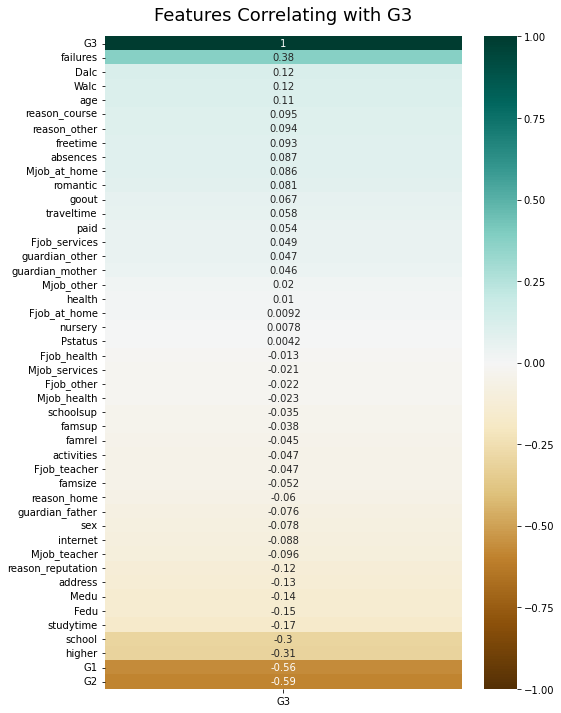

In [ ]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_port.corr()[['G3']].sort_values(by='G3', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with G3', fontdict={'fontsize':18}, pad=16);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


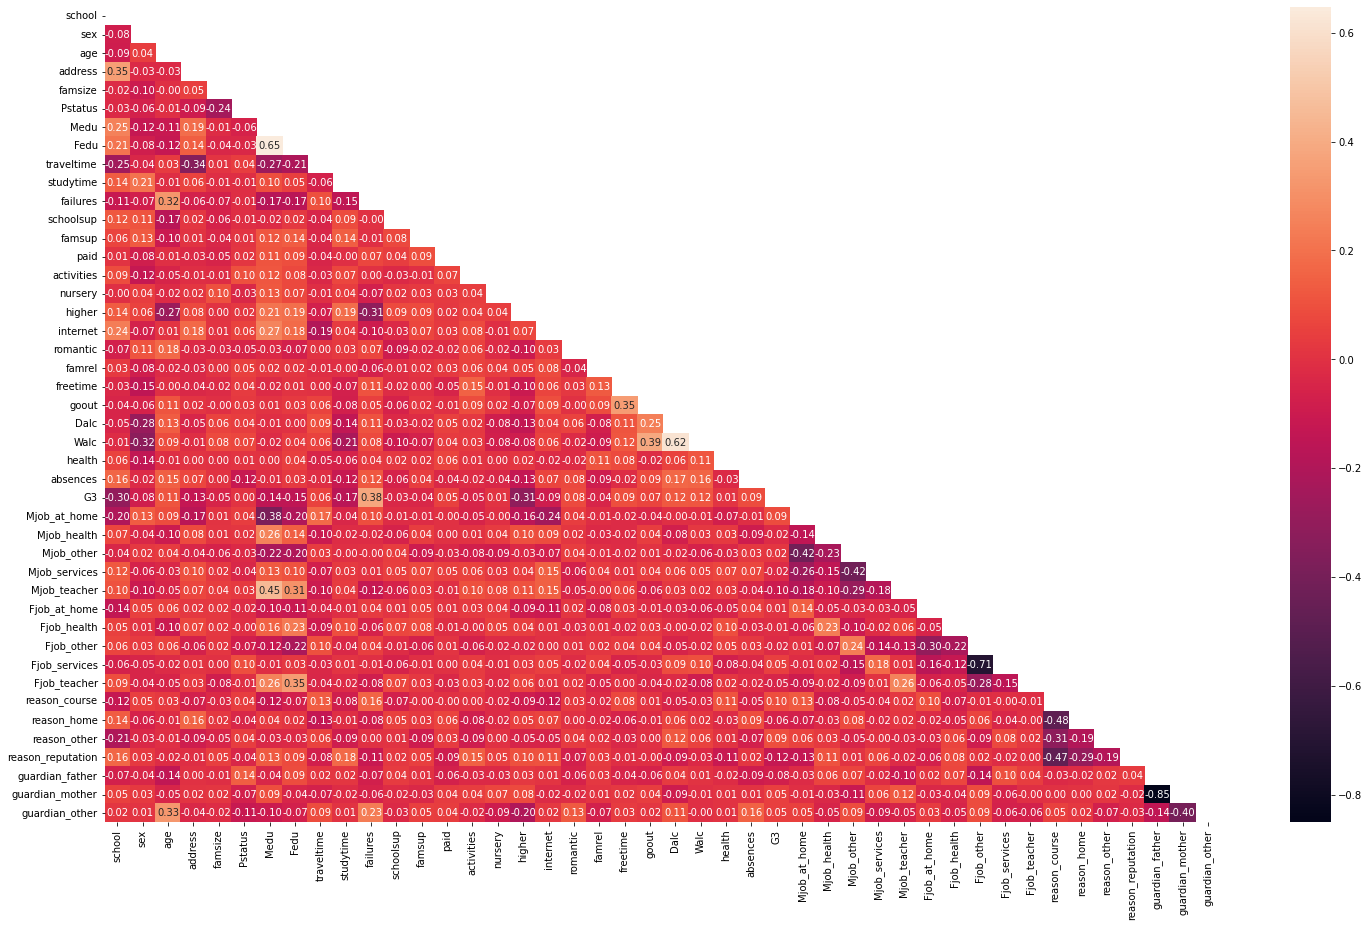

In [ ]:
corr = df_port.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_port.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

## Simple Methods

### Gaussian Naive with Bayes Risk Prediction

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

def BayesRiskNB(c01=None, c10=None):
  nb = GaussianNB()
  kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
  # y = df_port['G3']
  y = train['G3']

  # df_train = df_port.drop(columns={'G3'})
  df_train = train.drop(columns={'G3'})
  scores = []
  scores_ = []
  fold = []
  t = .5

  for train_index, test_index in kf.split(df_train, y):
      X_train, X_test = df_train.loc[train_index], df_train.loc[test_index]
      y_train, y_test = y[train_index], y[test_index]

      y_ = nb.fit(X_train, y_train).predict_proba(X_test)[:, 1]
      y_pred = (y_ > .5)*1

      probs = {'train': nb.predict_proba(X_train)[:, 1], 
               'test': nb.predict_proba(X_test)[:, 1]}


      if c01 and c10:
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        nu = c10*(1-np.mean(y_test))/(c01*np.mean(y_test))
        t = nu/(1+nu)
        
      y_pred = (y_ > t)*1

      fold.append({'probs': probs, 'y_train': y_train, 'y_test': y_test, 'model': nb, 'treshold': t})

      scores.append(recall_score(y_test, y_pred))
      scores_.append(accuracy_score(y_test, y_pred))

  return [scores, scores_, fold]

In [ ]:
default_cost = BayesRiskNB();
print('Default Cost (Recall, Accuracy):',np.mean(default_cost[0]), ',', np.mean(default_cost[1]))

optimal_cost = BayesRiskNB(1000, 20);
print('Optimal Cost (Recall, Accuracy):',np.mean(optimal_cost[0]), ',', np.mean(optimal_cost[1]))

Default Cost (Recall, Accuracy): 0.6655555555555555 , 0.7746430460074035
Optimal Cost (Recall, Accuracy): 0.76 , 0.7000264410364887


In [ ]:
clf = optimal_cost[2][np.argmax(optimal_cost[0])]['model']
t = optimal_cost[2][np.argmax(optimal_cost[0])]['treshold']

X_validate = validation.drop(columns={'G3'})
y_validate = validation['G3']

y_ = clf.predict_proba(X_validate)[:, 1]
probs = (y_ > t)*1

recall = recall_score(y_validate, probs)
accuracy = accuracy_score(y_validate, probs)


print('Recall, Accuracy:', recall, ',', accuracy)

Recall, Accuracy: 0.8 , 0.7272727272727273


### SVM with Bayes Risk

#### RBF

In [ ]:
def BayesRiskSVM(c01=None, c10=None):
  svm = SVC(probability=True)
  y = train['G3']
  df_train = train.drop(columns={'G3'})
  scores = []
  scores_ = []
  t = .5

  y_ = svm.fit(df_train, y).predict_proba(df_train)[:,1]
  y_pred = (y_ > .5)*1
  
  if c01 and c10:
    nu = c10*(1-np.mean(y))/(c01*np.mean(y))
    t = nu/(1+nu)
    
  y_pred = (y_ > t)*1

  scores.append(recall_score(y, y_pred))
  scores_.append(accuracy_score(y, y_pred))

  return [scores, scores_, t, svm]

In [ ]:
default_cost = BayesRiskSVM();
print('Default Cost (Recall, Accuracy):',np.mean(default_cost[0]), ',', np.mean(default_cost[1]))

optimal_cost = BayesRiskSVM(30, 1);
print('Optimal Cost (Recall, Accuracy):',np.mean(optimal_cost[0]), ',', np.mean(optimal_cost[1]))

Default Cost (Recall, Accuracy): 0.7052631578947368 , 0.926948051948052
Optimal Cost (Recall, Accuracy): 0.9263157894736842 , 0.887987012987013


In [ ]:
clf = optimal_cost[3]
t = optimal_cost[2]

X_validate = validation.drop(columns={'G3'})
y_validate = validation['G3']

y_ = clf.predict_proba(X_validate)[:, 1]
probs = (y_ > t)*1

recall = recall_score(y_validate, probs)
accuracy = accuracy_score(y_validate, probs)


print('Recall, Accuracy:', recall, ',', accuracy)

Recall, Accuracy: 0.8 , 0.7878787878787878


#### Linear

In [ ]:
def BayesRiskSVMLinear(c01=None, c10=None):
  svm = SVC(kernel="linear",probability=True)
  y = train['G3']
  df_train = train.drop(columns={'G3'})
  scores = []
  scores_ = []
  t = .5

  y_ = svm.fit(df_train, y).predict_proba(df_train)[:,1]
  y_pred = (y_ > .5)*1
  
  if c01 and c10:
    nu = c10*(1-np.mean(y))/(c01*np.mean(y))
    t = nu/(1+nu)
    
  y_pred = (y_ > t)*1

  scores.append(recall_score(y, y_pred))
  scores_.append(accuracy_score(y, y_pred))

  return [scores, scores_, t, svm]

In [ ]:
default_cost = BayesRiskSVMLinear();
print('Default Cost (Recall, Accuracy):',np.mean(default_cost[0]), ',', np.mean(default_cost[1]))

optimal_cost = BayesRiskSVMLinear(30, 1);
print('Optimal Cost (Recall, Accuracy):',np.mean(optimal_cost[0]), ',', np.mean(optimal_cost[1]))

Default Cost (Recall, Accuracy): 0.7473684210526316 , 0.9561688311688312
Optimal Cost (Recall, Accuracy): 0.9789473684210527 , 0.8636363636363636


In [ ]:
clf = optimal_cost[3]
t = optimal_cost[2]

X_validate = validation.drop(columns={'G3'})
y_validate = validation['G3']

y_ = clf.predict_proba(X_validate)[:, 1]
probs = (y_ > t)*1

recall = recall_score(y_validate, probs)
accuracy = accuracy_score(y_validate, probs)


print('Recall, Accuracy:', recall, ',', accuracy)

Recall, Accuracy: 1.0 , 0.8787878787878788


#### Optimized

In [6]:
def objective(trial):
  kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
  (data, target) = (train.drop(columns={'G3'}), train['G3'])
  scores = []
  param = {
    "C": trial.suggest_float("C", 0, 1),
    "kernel": trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"]),
  }

  if param['kernel'] in ['poly']:
    param['degree'] = trial.suggest_int("degree", 3, 30)
  
  svc = SVC(**param)

  for train_index, test_index in kf.split(data, target):
      X_train, X_test = data.loc[train_index], data.loc[test_index]
      y_train, y_test = target[train_index], target[test_index]

      y_ = svc.fit(X_train, y_train).predict(X_test)
      scores.append(recall_score(y_test, y_))

  return np.mean(scores)

In [7]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    \'{}\': {},".format(key, value))

[I 2022-11-20 18:14:36,200] A new study created in memory with name: no-name-3dd76f0f-d630-436f-91f9-f4cba4e153bc
[I 2022-11-20 18:14:46,558] Trial 0 finished with value: 0.6955555555555556 and parameters: {'C': 0.7388512551277405, 'kernel': 'linear'}. Best is trial 0 with value: 0.6955555555555556.
[I 2022-11-20 18:14:47,962] Trial 1 finished with value: 0.3222222222222222 and parameters: {'C': 0.8042093847452577, 'kernel': 'poly', 'degree': 11}. Best is trial 0 with value: 0.6955555555555556.
[I 2022-11-20 18:14:56,980] Trial 2 finished with value: 0.6955555555555556 and parameters: {'C': 0.6212929901701658, 'kernel': 'linear'}. Best is trial 0 with value: 0.6955555555555556.
[I 2022-11-20 18:15:03,934] Trial 3 finished with value: 0.7055555555555555 and parameters: {'C': 0.5204773203121696, 'kernel': 'linear'}. Best is trial 3 with value: 0.7055555555555555.
[I 2022-11-20 18:16:39,685] Trial 4 finished with value: 0.38888888888888884 and parameters: {'C': 0.15992895281704222, 'kerne

Number of finished trials:  100
Best trial:
  Value: 0.7055555555555555
  Params: 
    'C': 0.5204773203121696,
    'kernel': linear,


In [9]:
def BayesRiskSVMOptimized(c01=None, c10=None):
  svm = SVC(C=0.52, kernel="linear", probability=True)
  y = train['G3']
  df_train = train.drop(columns={'G3'})
  scores = []
  scores_ = []
  t = .5

  y_ = svm.fit(df_train, y).predict_proba(df_train)[:,1]
  y_pred = (y_ > .5)*1
  
  if c01 and c10:
    nu = c10*(1-np.mean(y))/(c01*np.mean(y))
    t = nu/(1+nu)
  
  y_pred = (y_ > t)*1

  scores.append(recall_score(y, y_pred))
  scores_.append(accuracy_score(y, y_pred))

  return [scores, scores_, t, svm]

In [10]:
default_cost = BayesRiskSVMOptimized();
print('Default Cost (Recall, Accuracy):',np.mean(default_cost[0]), ',', np.mean(default_cost[1]))

optimal_cost = BayesRiskSVMOptimized(32, 1);
print('Optimal Cost (Recall, Accuracy):',np.mean(optimal_cost[0]), ',', np.mean(optimal_cost[1]))

Default Cost (Recall, Accuracy): 0.7578947368421053 , 0.9561688311688312
Optimal Cost (Recall, Accuracy): 0.9789473684210527 , 0.8717532467532467


In [11]:
clf = optimal_cost[3]
t = optimal_cost[2]

X_validate = validation.drop(columns={'G3'})
y_validate = validation['G3']

y_ = clf.predict_proba(X_validate)[:, 1]
probs = (y_ > t)*1

recall = recall_score(y_validate, probs)
accuracy = accuracy_score(y_validate, probs)


print('Recall, Accuracy:', recall, ',', accuracy)

Recall, Accuracy: 1.0 , 0.8787878787878788


## Complex Methods

### K-nearst neighbors with OPTUNA and Bayes Risk

In [10]:
def objective(trial):
  kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
  (data, target) = (df_port.drop(columns={'G3'}), df_port['G3'])
  scores = []
  param = {
    "n_neighbors": trial.suggest_int("n_neighbors", 3, 15),
    "weights": trial.suggest_categorical("weights", ["uniform", "distance"]),
    "algorithm": trial.suggest_categorical("algorithm", ["auto", "ball_tree",
                                                        "kd_tree", "brute"]),
    "leaf_size": trial.suggest_int("leaf_size", 30, 300),
    "p": trial.suggest_int("p", 1, 2),
  }
  knn = KNeighborsClassifier(**param)

  for train_index, test_index in kf.split(data, target):
      X_train, X_test = data.loc[train_index], data.loc[test_index]
      y_train, y_test = target[train_index], target[test_index]

      y_ = knn.fit(X_train, y_train).predict(X_test)
      scores.append(recall_score(y_test, y_, zero_division = 0))

  return np.mean(scores)

In [11]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    \'{}\': {},".format(key, value))

[I 2022-11-20 13:46:54,579] A new study created in memory with name: no-name-598904ef-b915-4de1-84ad-23d5b01e8cd3
[I 2022-11-20 13:46:54,698] Trial 0 finished with value: 0.45999999999999996 and parameters: {'n_neighbors': 9, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 224, 'p': 1}. Best is trial 0 with value: 0.45999999999999996.
[I 2022-11-20 13:46:54,800] Trial 1 finished with value: 0.52 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 67, 'p': 1}. Best is trial 1 with value: 0.52.
[I 2022-11-20 13:46:54,869] Trial 2 finished with value: 0.4600000000000001 and parameters: {'n_neighbors': 13, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 197, 'p': 2}. Best is trial 1 with value: 0.52.
[I 2022-11-20 13:46:54,984] Trial 3 finished with value: 0.48999999999999994 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'kd_tree', 'leaf_size': 37, 'p': 1}. Best is trial 1 with value: 0.52.
[I 2022-11-

Number of finished trials:  100
Best trial:
  Value: 0.6100000000000001
  Params: 
    'n_neighbors': 3,
    'weights': distance,
    'algorithm': ball_tree,
    'leaf_size': 73,
    'p': 2,


In [17]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

def BayesRiskKNN(c01=None, c10=None):
  knn = KNeighborsClassifier(n_neighbors=3, weights="distance",
                             algorithm="ball_tree",leaf_size=73, p=2)
  kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
  y = train['G3']
  df_train = train.drop(columns={'G3'})
  scores = []
  scores_ = []
  fold = []
  t = .5

  for train_index, test_index in kf.split(df_train, y):
      X_train, X_test = df_train.loc[train_index], df_train.loc[test_index]
      y_train, y_test = y[train_index], y[test_index]

      y_ = knn.fit(X_train, y_train).predict_proba(X_test)[:, 1]
      y_pred = (y_ > .5)*1

      probs = {'train': knn.predict_proba(X_train)[:, 1], 
               'test': knn.predict_proba(X_test)[:, 1]}
      
      if c01 and c10:
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        nu = c10*(1-np.mean(y_test))/(c01*np.mean(y_test))
        t = nu/(1+nu)
      
      y_pred = (y_ > t)*1

      fold.append({'probs': probs, 'y_train': y_train, 'y_test': y_test, 'model': knn, 'treshold': t})

      scores.append(recall_score(y_test, y_pred))
      scores_.append(accuracy_score(y_test, y_pred))

  return [scores, scores_, fold]

In [18]:
default_cost = BayesRiskKNN();
print('Default Cost (Recall, Accuracy):',np.mean(default_cost[0]), ',', np.mean(default_cost[1]))

# Tem algo estranho aq
optimal_cost = BayesRiskKNN(100, 1);
print('Optimal Cost (Recall, Accuracy):',np.mean(optimal_cost[0]), ',', np.mean(optimal_cost[1]))

Default Cost (Recall, Accuracy): 0.43 , 0.8863299841353781
Optimal Cost (Recall, Accuracy): 0.7033333333333334 , 0.821311475409836


In [19]:
clf = optimal_cost[2][np.argmax(optimal_cost[0])]['model']
t = optimal_cost[2][np.argmax(optimal_cost[0])]['treshold']

X_validate = validation.drop(columns={'G3'})
y_validate = validation['G3']

y_ = clf.predict_proba(X_validate)[:, 1]
probs = (y_ > t)*1

recall = recall_score(y_validate, probs)
accuracy = accuracy_score(y_validate, probs)


print('Recall, Accuracy:', recall, ',', accuracy)

Recall, Accuracy: 0.8 , 0.8181818181818182


### Neural Network

In [55]:
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

In [92]:
def BayesRiskNeuralNetwork(c01=None, c10=None):
  clf1_nopreproc = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                                    optimizer_params=dict(lr=2e-2),
                                    scheduler_params={'step_size':10, 
                                                      'gamma':0.9},
                                    scheduler_fn=torch.optim.lr_scheduler.StepLR,
                                    mask_type='entmax'
                                    )

  kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
  (data, target) = (train.drop(columns={'G3'}), train['G3'])
  scores = []
  scores_ = []
  t = .5

  for train_index, test_index in kf.split(data, target):
    X_train, X_test = data.loc[train_index].values, data.loc[test_index].values
    y_train, y_test = target[train_index], target[test_index]

    # fit the model 
    clf1_nopreproc.fit(
        X_train,y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_name=['train', 'valid'],
        eval_metric=['auc','accuracy'],
        max_epochs=1000 , patience=50,
        batch_size=256, virtual_batch_size=128,
        num_workers=0,
        weights=1,
        drop_last=False
    )
    
    y_ = clf1_nopreproc.predict_proba(X_test)[:, 1]
    
    if c01 and c10:
      nu = c10*(1-np.mean(y_test))/(c01*np.mean(y_test))
      t = nu/(1+nu)
    
    y_pred = (y_ > t)*1

    scores.append(recall_score(y_test, y_pred))
    scores_.append(accuracy_score(y_test, y_pred))

  return [scores, scores_]

In [33]:
default_cost = BayesRiskNeuralNetwork();
print('Default Cost (Recall, Accuracy):',np.mean(default_cost[0]), ',', np.mean(default_cost[1]))

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.74098 | train_auc: 0.47061 | train_accuracy: 0.60289 | valid_auc: 0.625   | valid_accuracy: 0.66129 |  0:00:00s
epoch 1  | loss: 0.65038 | train_auc: 0.5842  | train_accuracy: 0.67148 | valid_auc: 0.45769 | valid_accuracy: 0.58065 |  0:00:00s
epoch 2  | loss: 0.59312 | train_auc: 0.64866 | train_accuracy: 0.76534 | valid_auc: 0.54808 | valid_accuracy: 0.75806 |  0:00:00s
epoch 3  | loss: 0.56751 | train_auc: 0.70623 | train_accuracy: 0.83935 | valid_auc: 0.68462 | valid_accuracy: 0.83871 |  0:00:00s
epoch 4  | loss: 0.49999 | train_auc: 0.6305  | train_accuracy: 0.82671 | valid_auc: 0.63269 | valid_accuracy: 0.80645 |  0:00:00s
epoch 5  | loss: 0.46922 | train_auc: 0.58156 | train_accuracy: 0.79422 | valid_auc: 0.575   | valid_accuracy: 0.77419 |  0:00:00s
epoch 6  | loss: 0.40028 | train_auc: 0.56388 | train_accuracy: 0.78881 | valid_auc: 0.58654 | valid_accuracy: 0.75806 |  0:00:00s
epoch 7  | loss: 0.35673 | train_auc: 0.54725 | train_accuracy: 0.82671 | valid_auc

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.74797 | train_auc: 0.47897 | train_accuracy: 0.63538 | valid_auc: 0.42115 | valid_accuracy: 0.64516 |  0:00:00s
epoch 1  | loss: 0.66629 | train_auc: 0.44149 | train_accuracy: 0.64621 | valid_auc: 0.30577 | valid_accuracy: 0.5     |  0:00:00s
epoch 2  | loss: 0.58957 | train_auc: 0.59849 | train_accuracy: 0.52166 | valid_auc: 0.41538 | valid_accuracy: 0.43548 |  0:00:00s
epoch 3  | loss: 0.53909 | train_auc: 0.61312 | train_accuracy: 0.56318 | valid_auc: 0.40192 | valid_accuracy: 0.48387 |  0:00:00s
epoch 4  | loss: 0.51471 | train_auc: 0.66191 | train_accuracy: 0.71841 | valid_auc: 0.49231 | valid_accuracy: 0.69355 |  0:00:00s
epoch 5  | loss: 0.43854 | train_auc: 0.74777 | train_accuracy: 0.82852 | valid_auc: 0.65385 | valid_accuracy: 0.80645 |  0:00:00s
epoch 6  | loss: 0.36523 | train_auc: 0.76571 | train_accuracy: 0.83755 | valid_auc: 0.66346 | valid_accuracy: 0.82258 |  0:00:00s
epoch 7  | loss: 0.33254 | train_auc: 0.71123 | train_accuracy: 0.83935 | valid_auc

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.75828 | train_auc: 0.43063 | train_accuracy: 0.57581 | valid_auc: 0.49038 | valid_accuracy: 0.6129  |  0:00:00s
epoch 1  | loss: 0.62652 | train_auc: 0.52575 | train_accuracy: 0.72383 | valid_auc: 0.44808 | valid_accuracy: 0.69355 |  0:00:00s
epoch 2  | loss: 0.59078 | train_auc: 0.50237 | train_accuracy: 0.66787 | valid_auc: 0.55192 | valid_accuracy: 0.66129 |  0:00:00s
epoch 3  | loss: 0.54172 | train_auc: 0.4891  | train_accuracy: 0.68412 | valid_auc: 0.66538 | valid_accuracy: 0.75806 |  0:00:00s
epoch 4  | loss: 0.47025 | train_auc: 0.48067 | train_accuracy: 0.73466 | valid_auc: 0.62692 | valid_accuracy: 0.70968 |  0:00:00s
epoch 5  | loss: 0.37446 | train_auc: 0.46151 | train_accuracy: 0.75812 | valid_auc: 0.70769 | valid_accuracy: 0.74194 |  0:00:00s
epoch 6  | loss: 0.33251 | train_auc: 0.51584 | train_accuracy: 0.75632 | valid_auc: 0.75385 | valid_accuracy: 0.77419 |  0:00:00s
epoch 7  | loss: 0.2597  | train_auc: 0.58056 | train_accuracy: 0.80866 | valid_auc

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.79573 | train_auc: 0.48745 | train_accuracy: 0.6444  | valid_auc: 0.30385 | valid_accuracy: 0.67742 |  0:00:00s
epoch 1  | loss: 0.71867 | train_auc: 0.45926 | train_accuracy: 0.68051 | valid_auc: 0.34231 | valid_accuracy: 0.67742 |  0:00:00s
epoch 2  | loss: 0.66107 | train_auc: 0.44686 | train_accuracy: 0.62274 | valid_auc: 0.20385 | valid_accuracy: 0.54839 |  0:00:00s
epoch 3  | loss: 0.5933  | train_auc: 0.4877  | train_accuracy: 0.5361  | valid_auc: 0.28846 | valid_accuracy: 0.48387 |  0:00:00s
epoch 4  | loss: 0.5358  | train_auc: 0.46881 | train_accuracy: 0.49097 | valid_auc: 0.33269 | valid_accuracy: 0.41935 |  0:00:00s
epoch 5  | loss: 0.49173 | train_auc: 0.46818 | train_accuracy: 0.55596 | valid_auc: 0.51154 | valid_accuracy: 0.54839 |  0:00:00s
epoch 6  | loss: 0.40801 | train_auc: 0.50235 | train_accuracy: 0.67329 | valid_auc: 0.50962 | valid_accuracy: 0.62903 |  0:00:00s
epoch 7  | loss: 0.34511 | train_auc: 0.61277 | train_accuracy: 0.7491  | valid_auc

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.64375 | train_auc: 0.56895 | train_accuracy: 0.49639 | valid_auc: 0.42308 | valid_accuracy: 0.43548 |  0:00:00s
epoch 2  | loss: 0.5994  | train_auc: 0.60857 | train_accuracy: 0.52708 | valid_auc: 0.53462 | valid_accuracy: 0.46774 |  0:00:00s
epoch 3  | loss: 0.56859 | train_auc: 0.66065 | train_accuracy: 0.61011 | valid_auc: 0.44615 | valid_accuracy: 0.51613 |  0:00:00s
epoch 4  | loss: 0.49719 | train_auc: 0.68712 | train_accuracy: 0.70217 | valid_auc: 0.53462 | valid_accuracy: 0.62903 |  0:00:00s
epoch 5  | loss: 0.42512 | train_auc: 0.63286 | train_accuracy: 0.76895 | valid_auc: 0.60769 | valid_accuracy: 0.75806 |  0:00:00s
epoch 6  | loss: 0.37105 | train_auc: 0.63126 | train_accuracy: 0.81949 | valid_auc: 0.61154 | valid_accuracy: 0.83871 |  0:00:00s
epoch 7  | loss: 0.31729 | train_auc: 0.60677 | train_accuracy: 0.8231  | valid_auc: 0.57115 | valid_accuracy: 0.83871 |  0:00:01s
epoch 8  | loss: 0.2691  | train_auc: 0.52432 | train_accuracy: 0.81949 | valid_auc

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.72027 | train_auc: 0.57871 | train_accuracy: 0.63177 | valid_auc: 0.61845 | valid_accuracy: 0.6129  |  0:00:00s
epoch 1  | loss: 0.65141 | train_auc: 0.53785 | train_accuracy: 0.59747 | valid_auc: 0.66038 | valid_accuracy: 0.64516 |  0:00:00s
epoch 2  | loss: 0.61173 | train_auc: 0.57325 | train_accuracy: 0.52708 | valid_auc: 0.67925 | valid_accuracy: 0.54839 |  0:00:00s
epoch 3  | loss: 0.55808 | train_auc: 0.57446 | train_accuracy: 0.49639 | valid_auc: 0.48637 | valid_accuracy: 0.46774 |  0:00:00s
epoch 4  | loss: 0.52748 | train_auc: 0.57563 | train_accuracy: 0.57762 | valid_auc: 0.55556 | valid_accuracy: 0.5     |  0:00:00s
epoch 5  | loss: 0.50007 | train_auc: 0.557   | train_accuracy: 0.70036 | valid_auc: 0.63312 | valid_accuracy: 0.67742 |  0:00:00s
epoch 6  | loss: 0.39901 | train_auc: 0.61822 | train_accuracy: 0.73827 | valid_auc: 0.7065  | valid_accuracy: 0.79032 |  0:00:00s
epoch 7  | loss: 0.33684 | train_auc: 0.64371 | train_accuracy: 0.70036 | valid_auc

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.6455  | train_auc: 0.59278 | train_accuracy: 0.71892 | valid_auc: 0.51923 | valid_accuracy: 0.70492 |  0:00:00s
epoch 2  | loss: 0.57259 | train_auc: 0.6495  | train_accuracy: 0.72252 | valid_auc: 0.64744 | valid_accuracy: 0.77049 |  0:00:00s
epoch 3  | loss: 0.55064 | train_auc: 0.63522 | train_accuracy: 0.79099 | valid_auc: 0.72222 | valid_accuracy: 0.83607 |  0:00:00s
epoch 4  | loss: 0.51484 | train_auc: 0.59414 | train_accuracy: 0.79099 | valid_auc: 0.82692 | valid_accuracy: 0.88525 |  0:00:00s
epoch 5  | loss: 0.4133  | train_auc: 0.5813  | train_accuracy: 0.85045 | valid_auc: 0.48504 | valid_accuracy: 0.85246 |  0:00:00s
epoch 6  | loss: 0.33681 | train_auc: 0.55229 | train_accuracy: 0.84685 | valid_auc: 0.47009 | valid_accuracy: 0.85246 |  0:00:00s
epoch 7  | loss: 0.2651  | train_auc: 0.60336 | train_accuracy: 0.84505 | valid_auc: 0.52778 | valid_accuracy: 0.85246 |  0:00:01s
epoch 8  | loss: 0.29362 | train_auc: 0.64675 | train_accuracy: 0.84865 | valid_auc

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.7741  | train_auc: 0.45086 | train_accuracy: 0.58018 | valid_auc: 0.40812 | valid_accuracy: 0.60656 |  0:00:00s
epoch 1  | loss: 0.68344 | train_auc: 0.51257 | train_accuracy: 0.64505 | valid_auc: 0.6047  | valid_accuracy: 0.68852 |  0:00:00s
epoch 2  | loss: 0.58587 | train_auc: 0.58462 | train_accuracy: 0.67027 | valid_auc: 0.58974 | valid_accuracy: 0.63934 |  0:00:00s
epoch 3  | loss: 0.52477 | train_auc: 0.68067 | train_accuracy: 0.73694 | valid_auc: 0.54487 | valid_accuracy: 0.59016 |  0:00:00s
epoch 4  | loss: 0.43817 | train_auc: 0.69353 | train_accuracy: 0.81802 | valid_auc: 0.64744 | valid_accuracy: 0.72131 |  0:00:00s
epoch 5  | loss: 0.37107 | train_auc: 0.68994 | train_accuracy: 0.84324 | valid_auc: 0.80983 | valid_accuracy: 0.85246 |  0:00:00s
epoch 6  | loss: 0.31731 | train_auc: 0.73184 | train_accuracy: 0.84324 | valid_auc: 0.77991 | valid_accuracy: 0.85246 |  0:00:00s
epoch 7  | loss: 0.26896 | train_auc: 0.70762 | train_accuracy: 0.84505 | valid_auc

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.76524 | train_auc: 0.53022 | train_accuracy: 0.61802 | valid_auc: 0.53098 | valid_accuracy: 0.59016 |  0:00:00s
epoch 1  | loss: 0.63919 | train_auc: 0.57245 | train_accuracy: 0.64505 | valid_auc: 0.59402 | valid_accuracy: 0.59016 |  0:00:00s
epoch 2  | loss: 0.61829 | train_auc: 0.58866 | train_accuracy: 0.62523 | valid_auc: 0.53632 | valid_accuracy: 0.57377 |  0:00:00s
epoch 3  | loss: 0.58625 | train_auc: 0.54669 | train_accuracy: 0.64865 | valid_auc: 0.52991 | valid_accuracy: 0.67213 |  0:00:00s
epoch 4  | loss: 0.52663 | train_auc: 0.59736 | train_accuracy: 0.68108 | valid_auc: 0.54274 | valid_accuracy: 0.62295 |  0:00:00s
epoch 5  | loss: 0.47105 | train_auc: 0.61787 | train_accuracy: 0.73333 | valid_auc: 0.58761 | valid_accuracy: 0.77049 |  0:00:00s
epoch 6  | loss: 0.37233 | train_auc: 0.64392 | train_accuracy: 0.82342 | valid_auc: 0.61752 | valid_accuracy: 0.80328 |  0:00:00s
epoch 7  | loss: 0.32397 | train_auc: 0.57217 | train_accuracy: 0.84144 | valid_auc

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.7907  | train_auc: 0.56211 | train_accuracy: 0.5982  | valid_auc: 0.46795 | valid_accuracy: 0.4918  |  0:00:00s
epoch 1  | loss: 0.65785 | train_auc: 0.64506 | train_accuracy: 0.7027  | valid_auc: 0.61538 | valid_accuracy: 0.67213 |  0:00:00s
epoch 2  | loss: 0.62699 | train_auc: 0.5961  | train_accuracy: 0.74595 | valid_auc: 0.55128 | valid_accuracy: 0.72131 |  0:00:00s
epoch 3  | loss: 0.57808 | train_auc: 0.58197 | train_accuracy: 0.71892 | valid_auc: 0.47009 | valid_accuracy: 0.59016 |  0:00:00s
epoch 4  | loss: 0.54998 | train_auc: 0.58841 | train_accuracy: 0.68468 | valid_auc: 0.47863 | valid_accuracy: 0.60656 |  0:00:00s
epoch 5  | loss: 0.45268 | train_auc: 0.59491 | train_accuracy: 0.69189 | valid_auc: 0.6688  | valid_accuracy: 0.68852 |  0:00:00s
epoch 6  | loss: 0.40511 | train_auc: 0.58687 | train_accuracy: 0.8     | valid_auc: 0.5641  | valid_accuracy: 0.68852 |  0:00:00s
epoch 7  | loss: 0.33574 | train_auc: 0.62101 | train_accuracy: 0.83604 | valid_auc

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [89]:
optimal_cost = BayesRiskNeuralNetwork(1000, 10);
print('Optimal Cost (Recall, Accuracy):',np.mean(optimal_cost[0]), ',', np.mean(optimal_cost[1]))

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.74098 | train_auc: 0.47061 | train_accuracy: 0.60289 | valid_auc: 0.625   | valid_accuracy: 0.66129 |  0:00:00s
epoch 1  | loss: 0.65038 | train_auc: 0.5842  | train_accuracy: 0.67148 | valid_auc: 0.45769 | valid_accuracy: 0.58065 |  0:00:00s
epoch 2  | loss: 0.59312 | train_auc: 0.64866 | train_accuracy: 0.76534 | valid_auc: 0.54808 | valid_accuracy: 0.75806 |  0:00:00s
epoch 3  | loss: 0.56751 | train_auc: 0.70623 | train_accuracy: 0.83935 | valid_auc: 0.68462 | valid_accuracy: 0.83871 |  0:00:00s
epoch 4  | loss: 0.49999 | train_auc: 0.6305  | train_accuracy: 0.82671 | valid_auc: 0.63269 | valid_accuracy: 0.80645 |  0:00:00s
epoch 5  | loss: 0.46922 | train_auc: 0.58156 | train_accuracy: 0.79422 | valid_auc: 0.575   | valid_accuracy: 0.77419 |  0:00:00s
epoch 6  | loss: 0.40028 | train_auc: 0.56388 | train_accuracy: 0.78881 | valid_auc: 0.58654 | valid_accuracy: 0.75806 |  0:00:00s
epoch 7  | loss: 0.35673 | train_auc: 0.54725 | train_accuracy: 0.82671 | valid_auc

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.66629 | train_auc: 0.44149 | train_accuracy: 0.64621 | valid_auc: 0.30577 | valid_accuracy: 0.5     |  0:00:00s
epoch 2  | loss: 0.58957 | train_auc: 0.59849 | train_accuracy: 0.52166 | valid_auc: 0.41538 | valid_accuracy: 0.43548 |  0:00:00s
epoch 3  | loss: 0.53909 | train_auc: 0.61312 | train_accuracy: 0.56318 | valid_auc: 0.40192 | valid_accuracy: 0.48387 |  0:00:00s
epoch 4  | loss: 0.51471 | train_auc: 0.66191 | train_accuracy: 0.71841 | valid_auc: 0.49231 | valid_accuracy: 0.69355 |  0:00:00s
epoch 5  | loss: 0.43854 | train_auc: 0.74777 | train_accuracy: 0.82852 | valid_auc: 0.65385 | valid_accuracy: 0.80645 |  0:00:00s
epoch 6  | loss: 0.36523 | train_auc: 0.76571 | train_accuracy: 0.83755 | valid_auc: 0.66346 | valid_accuracy: 0.82258 |  0:00:00s
epoch 7  | loss: 0.33254 | train_auc: 0.71123 | train_accuracy: 0.83935 | valid_auc: 0.63269 | valid_accuracy: 0.83871 |  0:00:01s
epoch 8  | loss: 0.26704 | train_auc: 0.65912 | train_accuracy: 0.84477 | valid_auc

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.62652 | train_auc: 0.52575 | train_accuracy: 0.72383 | valid_auc: 0.44808 | valid_accuracy: 0.69355 |  0:00:00s
epoch 2  | loss: 0.59078 | train_auc: 0.50237 | train_accuracy: 0.66787 | valid_auc: 0.55192 | valid_accuracy: 0.66129 |  0:00:00s
epoch 3  | loss: 0.54172 | train_auc: 0.4891  | train_accuracy: 0.68412 | valid_auc: 0.66538 | valid_accuracy: 0.75806 |  0:00:00s
epoch 4  | loss: 0.47025 | train_auc: 0.48067 | train_accuracy: 0.73466 | valid_auc: 0.62692 | valid_accuracy: 0.70968 |  0:00:00s
epoch 5  | loss: 0.37446 | train_auc: 0.46151 | train_accuracy: 0.75812 | valid_auc: 0.70769 | valid_accuracy: 0.74194 |  0:00:00s
epoch 6  | loss: 0.33251 | train_auc: 0.51584 | train_accuracy: 0.75632 | valid_auc: 0.75385 | valid_accuracy: 0.77419 |  0:00:00s
epoch 7  | loss: 0.2597  | train_auc: 0.58056 | train_accuracy: 0.80866 | valid_auc: 0.66923 | valid_accuracy: 0.79032 |  0:00:00s
epoch 8  | loss: 0.25006 | train_auc: 0.63088 | train_accuracy: 0.83394 | valid_auc

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.79573 | train_auc: 0.48745 | train_accuracy: 0.6444  | valid_auc: 0.30385 | valid_accuracy: 0.67742 |  0:00:00s
epoch 1  | loss: 0.71867 | train_auc: 0.45926 | train_accuracy: 0.68051 | valid_auc: 0.34231 | valid_accuracy: 0.67742 |  0:00:00s
epoch 2  | loss: 0.66107 | train_auc: 0.44686 | train_accuracy: 0.62274 | valid_auc: 0.20385 | valid_accuracy: 0.54839 |  0:00:00s
epoch 3  | loss: 0.5933  | train_auc: 0.4877  | train_accuracy: 0.5361  | valid_auc: 0.28846 | valid_accuracy: 0.48387 |  0:00:00s
epoch 4  | loss: 0.5358  | train_auc: 0.46881 | train_accuracy: 0.49097 | valid_auc: 0.33269 | valid_accuracy: 0.41935 |  0:00:00s
epoch 5  | loss: 0.49173 | train_auc: 0.46818 | train_accuracy: 0.55596 | valid_auc: 0.51154 | valid_accuracy: 0.54839 |  0:00:00s
epoch 6  | loss: 0.40801 | train_auc: 0.50235 | train_accuracy: 0.67329 | valid_auc: 0.50962 | valid_accuracy: 0.62903 |  0:00:00s
epoch 7  | loss: 0.34511 | train_auc: 0.61277 | train_accuracy: 0.7491  | valid_auc

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.79352 | train_auc: 0.58731 | train_accuracy: 0.58123 | valid_auc: 0.53654 | valid_accuracy: 0.66129 |  0:00:00s
epoch 1  | loss: 0.64375 | train_auc: 0.56895 | train_accuracy: 0.49639 | valid_auc: 0.42308 | valid_accuracy: 0.43548 |  0:00:00s
epoch 2  | loss: 0.5994  | train_auc: 0.60857 | train_accuracy: 0.52708 | valid_auc: 0.53462 | valid_accuracy: 0.46774 |  0:00:00s
epoch 3  | loss: 0.56859 | train_auc: 0.66065 | train_accuracy: 0.61011 | valid_auc: 0.44615 | valid_accuracy: 0.51613 |  0:00:00s
epoch 4  | loss: 0.49719 | train_auc: 0.68712 | train_accuracy: 0.70217 | valid_auc: 0.53462 | valid_accuracy: 0.62903 |  0:00:00s
epoch 5  | loss: 0.42512 | train_auc: 0.63286 | train_accuracy: 0.76895 | valid_auc: 0.60769 | valid_accuracy: 0.75806 |  0:00:00s
epoch 6  | loss: 0.37105 | train_auc: 0.63126 | train_accuracy: 0.81949 | valid_auc: 0.61154 | valid_accuracy: 0.83871 |  0:00:00s
epoch 7  | loss: 0.31729 | train_auc: 0.60677 | train_accuracy: 0.8231  | valid_auc

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.65141 | train_auc: 0.53785 | train_accuracy: 0.59747 | valid_auc: 0.66038 | valid_accuracy: 0.64516 |  0:00:00s
epoch 2  | loss: 0.61173 | train_auc: 0.57325 | train_accuracy: 0.52708 | valid_auc: 0.67925 | valid_accuracy: 0.54839 |  0:00:00s
epoch 3  | loss: 0.55808 | train_auc: 0.57446 | train_accuracy: 0.49639 | valid_auc: 0.48637 | valid_accuracy: 0.46774 |  0:00:00s
epoch 4  | loss: 0.52748 | train_auc: 0.57563 | train_accuracy: 0.57762 | valid_auc: 0.55556 | valid_accuracy: 0.5     |  0:00:00s
epoch 5  | loss: 0.50007 | train_auc: 0.557   | train_accuracy: 0.70036 | valid_auc: 0.63312 | valid_accuracy: 0.67742 |  0:00:00s
epoch 6  | loss: 0.39901 | train_auc: 0.61822 | train_accuracy: 0.73827 | valid_auc: 0.7065  | valid_accuracy: 0.79032 |  0:00:00s
epoch 7  | loss: 0.33684 | train_auc: 0.64371 | train_accuracy: 0.70036 | valid_auc: 0.6499  | valid_accuracy: 0.67742 |  0:00:00s
epoch 8  | loss: 0.33619 | train_auc: 0.63847 | train_accuracy: 0.71119 | valid_auc

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.7549  | train_auc: 0.59701 | train_accuracy: 0.7045  | valid_auc: 0.55769 | valid_accuracy: 0.68852 |  0:00:00s
epoch 1  | loss: 0.6455  | train_auc: 0.59278 | train_accuracy: 0.71892 | valid_auc: 0.51923 | valid_accuracy: 0.70492 |  0:00:00s
epoch 2  | loss: 0.57259 | train_auc: 0.6495  | train_accuracy: 0.72252 | valid_auc: 0.64744 | valid_accuracy: 0.77049 |  0:00:00s
epoch 3  | loss: 0.55064 | train_auc: 0.63522 | train_accuracy: 0.79099 | valid_auc: 0.72222 | valid_accuracy: 0.83607 |  0:00:00s
epoch 4  | loss: 0.51484 | train_auc: 0.59414 | train_accuracy: 0.79099 | valid_auc: 0.82692 | valid_accuracy: 0.88525 |  0:00:00s
epoch 5  | loss: 0.4133  | train_auc: 0.5813  | train_accuracy: 0.85045 | valid_auc: 0.48504 | valid_accuracy: 0.85246 |  0:00:00s
epoch 6  | loss: 0.33681 | train_auc: 0.55229 | train_accuracy: 0.84685 | valid_auc: 0.47009 | valid_accuracy: 0.85246 |  0:00:00s
epoch 7  | loss: 0.2651  | train_auc: 0.60336 | train_accuracy: 0.84505 | valid_auc

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.68344 | train_auc: 0.51257 | train_accuracy: 0.64505 | valid_auc: 0.6047  | valid_accuracy: 0.68852 |  0:00:00s
epoch 2  | loss: 0.58587 | train_auc: 0.58462 | train_accuracy: 0.67027 | valid_auc: 0.58974 | valid_accuracy: 0.63934 |  0:00:00s
epoch 3  | loss: 0.52477 | train_auc: 0.68067 | train_accuracy: 0.73694 | valid_auc: 0.54487 | valid_accuracy: 0.59016 |  0:00:00s
epoch 4  | loss: 0.43817 | train_auc: 0.69353 | train_accuracy: 0.81802 | valid_auc: 0.64744 | valid_accuracy: 0.72131 |  0:00:00s
epoch 5  | loss: 0.37107 | train_auc: 0.68994 | train_accuracy: 0.84324 | valid_auc: 0.80983 | valid_accuracy: 0.85246 |  0:00:00s
epoch 6  | loss: 0.31731 | train_auc: 0.73184 | train_accuracy: 0.84324 | valid_auc: 0.77991 | valid_accuracy: 0.85246 |  0:00:00s
epoch 7  | loss: 0.26896 | train_auc: 0.70762 | train_accuracy: 0.84505 | valid_auc: 0.74573 | valid_accuracy: 0.85246 |  0:00:00s
epoch 8  | loss: 0.25866 | train_auc: 0.67752 | train_accuracy: 0.84685 | valid_auc

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 1  | loss: 0.63919 | train_auc: 0.57245 | train_accuracy: 0.64505 | valid_auc: 0.59402 | valid_accuracy: 0.59016 |  0:00:00s
epoch 2  | loss: 0.61829 | train_auc: 0.58866 | train_accuracy: 0.62523 | valid_auc: 0.53632 | valid_accuracy: 0.57377 |  0:00:00s
epoch 3  | loss: 0.58625 | train_auc: 0.54669 | train_accuracy: 0.64865 | valid_auc: 0.52991 | valid_accuracy: 0.67213 |  0:00:00s
epoch 4  | loss: 0.52663 | train_auc: 0.59736 | train_accuracy: 0.68108 | valid_auc: 0.54274 | valid_accuracy: 0.62295 |  0:00:00s
epoch 5  | loss: 0.47105 | train_auc: 0.61787 | train_accuracy: 0.73333 | valid_auc: 0.58761 | valid_accuracy: 0.77049 |  0:00:00s
epoch 6  | loss: 0.37233 | train_auc: 0.64392 | train_accuracy: 0.82342 | valid_auc: 0.61752 | valid_accuracy: 0.80328 |  0:00:00s
epoch 7  | loss: 0.32397 | train_auc: 0.57217 | train_accuracy: 0.84144 | valid_auc: 0.4765  | valid_accuracy: 0.83607 |  0:00:00s
epoch 8  | loss: 0.24538 | train_auc: 0.55494 | train_accuracy: 0.84324 | valid_auc

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.7907  | train_auc: 0.56211 | train_accuracy: 0.5982  | valid_auc: 0.46795 | valid_accuracy: 0.4918  |  0:00:00s
epoch 1  | loss: 0.65785 | train_auc: 0.64506 | train_accuracy: 0.7027  | valid_auc: 0.61538 | valid_accuracy: 0.67213 |  0:00:00s
epoch 2  | loss: 0.62699 | train_auc: 0.5961  | train_accuracy: 0.74595 | valid_auc: 0.55128 | valid_accuracy: 0.72131 |  0:00:00s
epoch 3  | loss: 0.57808 | train_auc: 0.58197 | train_accuracy: 0.71892 | valid_auc: 0.47009 | valid_accuracy: 0.59016 |  0:00:00s
epoch 4  | loss: 0.54998 | train_auc: 0.58841 | train_accuracy: 0.68468 | valid_auc: 0.47863 | valid_accuracy: 0.60656 |  0:00:00s
epoch 5  | loss: 0.45268 | train_auc: 0.59491 | train_accuracy: 0.69189 | valid_auc: 0.6688  | valid_accuracy: 0.68852 |  0:00:00s
epoch 6  | loss: 0.40511 | train_auc: 0.58687 | train_accuracy: 0.8     | valid_auc: 0.5641  | valid_accuracy: 0.68852 |  0:00:00s
epoch 7  | loss: 0.33574 | train_auc: 0.62101 | train_accuracy: 0.83604 | valid_auc

c:\Users\Caio\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
